In [60]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [98]:
df = pd.read_csv("TrafficTwoMonth.csv")

In [99]:
#df.drop(columns=["BusCount", "BikeCount", "Total"], inplace=True)
#add new total column
#df["Total"] = df["CarCount"] + df["TruckCount"]
print(df.head())
print(df["Traffic Situation"].value_counts())

          Time  Date Day of the week  CarCount  BikeCount  BusCount  \
0  12:00:00 AM    10         Tuesday        13          2         2   
1  12:15:00 AM    10         Tuesday        14          1         1   
2  12:30:00 AM    10         Tuesday        10          2         2   
3  12:45:00 AM    10         Tuesday        10          2         2   
4   1:00:00 AM    10         Tuesday        11          2         1   

   TruckCount  Total Traffic Situation  
0          24     41            normal  
1          36     52            normal  
2          32     46            normal  
3          36     50            normal  
4          34     48            normal  
Traffic Situation
normal    3610
heavy     1137
low        834
high       371
Name: count, dtype: int64


In [100]:
#get rid of the date in the time column
def convert_to_military_time(time_str):
    try:
        # Try to parse as 12-hour format
        return pd.to_datetime(time_str, format='%I:%M:%S %p').strftime('%H:%M:%S')
    except ValueError:
        return pd.to_datetime(time_str, format='%H:%M:%S').strftime('%H:%M:%S')

df['Time'] = df['Time'].apply(convert_to_military_time)

#replace string attributes with numerical values in the Time column to use it in the model
df['Time'] = df['Time'].str.replace(':', '').astype(int)

# display new time column
print(df['Time'])

"""
#create a weekday/weekend column
df['Weekday'] = pd.to_datetime(df['Date']).dt.dayofweek
df['Weekday'] = (df['Weekday'] < 5).astype(int) 

#display new weekday column
print(df['Weekday'])
"""

0            0
1         1500
2         3000
3         4500
4        10000
         ...  
5947    224500
5948    230000
5949    231500
5950    233000
5951    234500
Name: Time, Length: 5952, dtype: int32


"\n#create a weekday/weekend column\ndf['Weekday'] = pd.to_datetime(df['Date']).dt.dayofweek\ndf['Weekday'] = (df['Weekday'] < 5).astype(int) \n\n#display new weekday column\nprint(df['Weekday'])\n"

In [ ]:
#label encoding - use this on categorical data
Le = LabelEncoder()
df['Day of the week'] = Le.fit_transform(df['Day of the week'])

#create our X and y variables for the model
X = df.drop(columns=["Traffic Situation"]) #features
y = df["Traffic Situation"] #target variable


#label encoding for the target variable
y = Le.fit_transform(y)

#print the encoded values mapped to the original values
print("Label Encoded Values for Traffic Situation:")
print(dict(zip(Le.transform(Le.classes_), Le.classes_)))

#show the value counts of the target variable
print(pd.Series(y).value_counts())
#split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

3    3610
0    1137
2     834
1     371
Name: count, dtype: int64


Accuracy: 99.66%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       216
           1       0.99      0.98      0.98        81
           2       1.00      1.00      1.00       146
           3       1.00      1.00      1.00       748

    accuracy                           1.00      1191
   macro avg       1.00      0.99      0.99      1191
weighted avg       1.00      1.00      1.00      1191



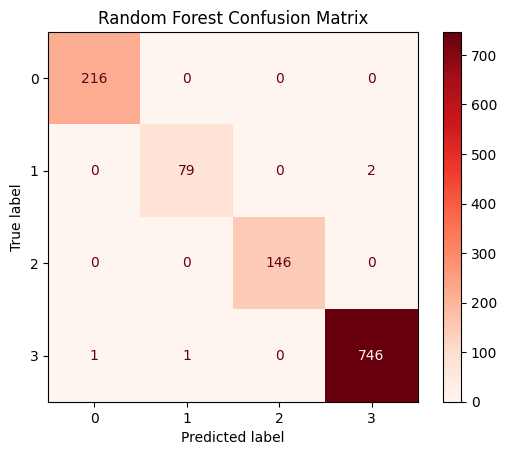

In [102]:
#train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

#make predictions
y_pred = model.predict(X_test)

#evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Reds")
plt.title("Random Forest Confusion Matrix")
plt.show()

Accuracy: 99.92%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       216
           1       0.99      1.00      0.99        81
           2       1.00      1.00      1.00       146
           3       1.00      1.00      1.00       748

    accuracy                           1.00      1191
   macro avg       1.00      1.00      1.00      1191
weighted avg       1.00      1.00      1.00      1191



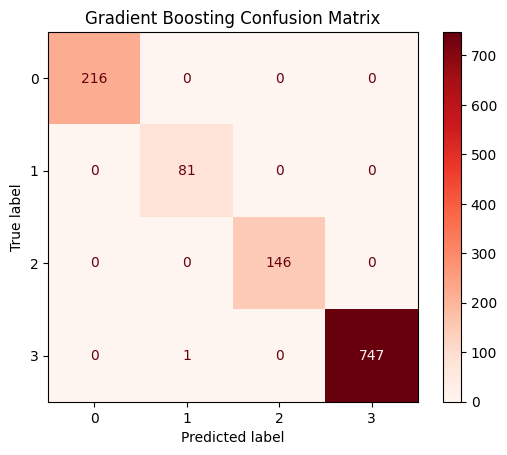

In [103]:
#gradient boosting
model = GradientBoostingClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Reds")
plt.title("Gradient Boosting Confusion Matrix")
plt.show()

Accuracy: 99.83%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       216
           1       0.99      0.99      0.99        81
           2       1.00      1.00      1.00       146
           3       1.00      1.00      1.00       748

    accuracy                           1.00      1191
   macro avg       1.00      1.00      1.00      1191
weighted avg       1.00      1.00      1.00      1191



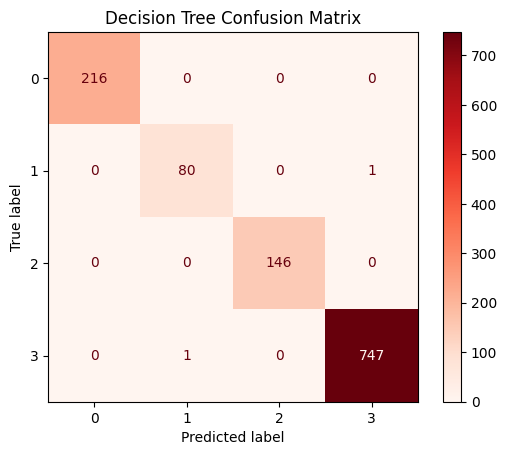

In [104]:
dt = DecisionTreeClassifier(random_state=42, max_depth=12)
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Reds")
plt.title("Decision Tree Confusion Matrix")
plt.show()

Accuracy: 88.66%
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       216
           1       0.68      0.47      0.55        81
           2       0.79      0.71      0.75       146
           3       0.89      0.94      0.92       748

    accuracy                           0.89      1191
   macro avg       0.83      0.77      0.80      1191
weighted avg       0.88      0.89      0.88      1191



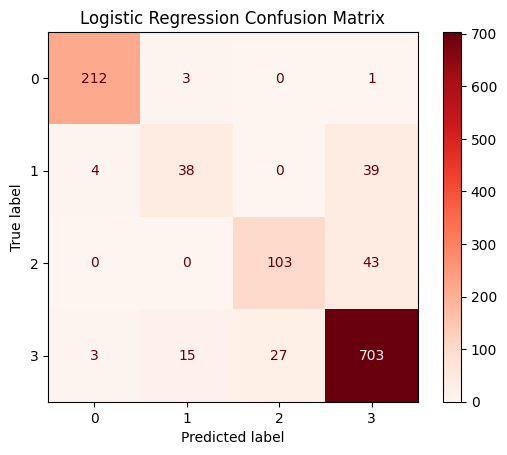

In [105]:
#scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#logistic regression
lr = LogisticRegression(random_state=42)
lr.fit(X_train_scaled, y_train)

y_pred = lr.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)

print("Accuracy: {:.2f}%".format(accuracy * 100))

print(classification_report(y_test, y_pred))


cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Reds")
plt.title("Logistic Regression Confusion Matrix")

plt.show()

Accuracy: 94.71%
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       216
           1       0.87      0.73      0.79        81
           2       0.94      0.88      0.91       146
           3       0.95      0.98      0.96       748

    accuracy                           0.95      1191
   macro avg       0.93      0.89      0.91      1191
weighted avg       0.95      0.95      0.95      1191



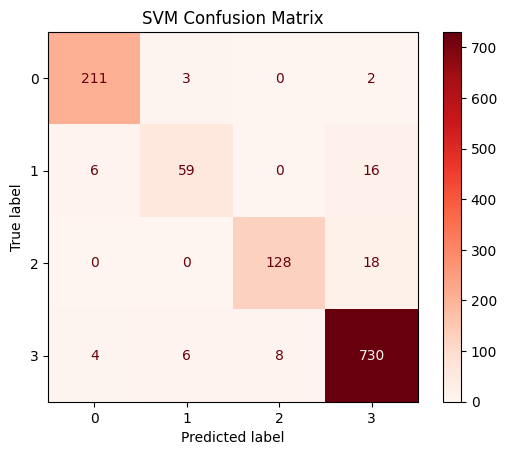

In [106]:
#support vector machine
svm = SVC(random_state=42)
svm.fit(X_train_scaled, y_train)

y_pred = svm.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Reds")
plt.title("SVM Confusion Matrix")
plt.show()

Accuracy: 91.44%
              precision    recall  f1-score   support

           0       0.91      0.94      0.93       216
           1       0.74      0.67      0.70        81
           2       0.90      0.83      0.86       146
           3       0.93      0.95      0.94       748

    accuracy                           0.91      1191
   macro avg       0.87      0.85      0.86      1191
weighted avg       0.91      0.91      0.91      1191



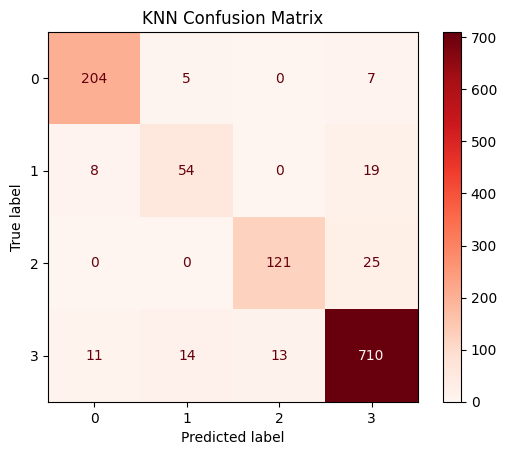

In [107]:
#k-nearest neighbors
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

y_pred = knn.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Reds")
plt.title("KNN Confusion Matrix")
plt.show()